# Fichier pour l'analyse du jeu de données

## Importation des modules et du dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("dataset_cleaned.csv")

Rappel concernant le jeu de données :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1337 non-null   int64  
 1   age         1337 non-null   int64  
 2   sex         1337 non-null   object 
 3   bmi         1337 non-null   float64
 4   children    1337 non-null   int64  
 5   smoker      1337 non-null   object 
 6   region      1337 non-null   object 
 7   charges     1337 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


## Analyses univariées

### Variable age

Pour visualiser la variable age dans un graphique, il faut aggreger les valeurs en classes représentés par plusieurs tranches d'âges.

In [4]:
age_range = {
    "0": [18, 24],
    "1": [25, 34],
    "2": [35, 44],
    "3": [45, 54],
    "4": [55, 64],
    }

age_count = []
for age in data["age"]:
    for i in range(len(age_range)):
        if age >= age_range[str(i)][0] and age <= age_range[str(i)][1]:
            age_count.append(f"{age_range[str(i)][0]}-{age_range[str(i)][1]}")
            continue

data["age_range"] = age_count

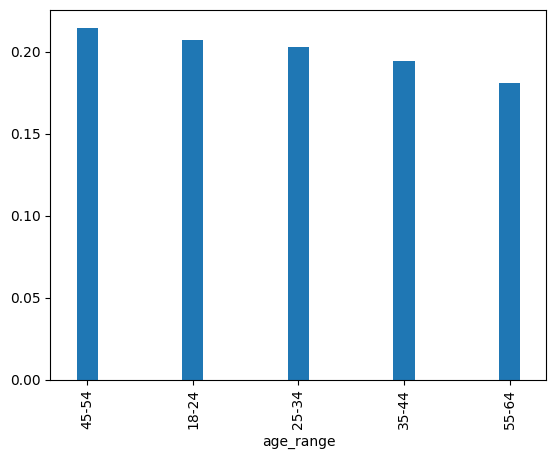

In [5]:
# Diagramme en bar chart
data["age_range"].value_counts(normalize=True).plot(kind="bar", width=0.2)
plt.show()

On remarque que la proportion de chaque classe est proche de 20% au sein de cet échantillon.

### Variable sex

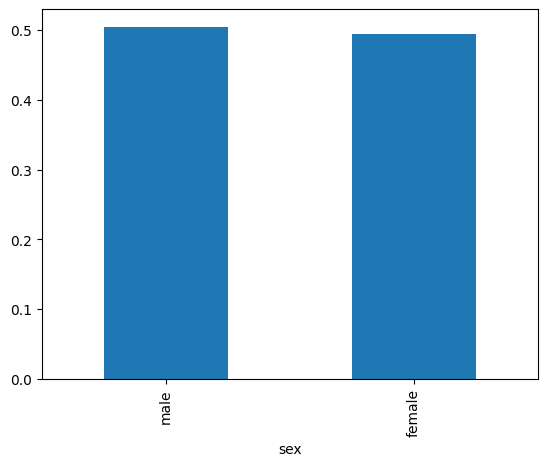

In [6]:
# Diagramme bar chart
data["sex"].value_counts(normalize=True).plot(kind="bar")
plt.show()

Pour la variable sex la répartition est quasiment égale.

### Variable bmi

Pour la variable bmi on peut aggréger les différentes valeurs en classes représentées par les différentes catégories de l'IMC.

In [7]:
bmi_groups = [
    {"category": "Underweight", "range": [float("-inf"), 18.499]},
    {"category": "Healthy weight", "range": [18.5, 24.999]},
    {"category": "Overweight", "range": [25, 29.999]},
    {"category": "Obesity class I", "range": [30, 34.999]},
    {"category": "Obesity class II", "range": [35, 39.999]},
    {"category": "Obesity class III", "range": [40, float("inf")]},
]

bmi_count = []
for bmi in data["bmi"]:
    for group in bmi_groups:
        if bmi >= group["range"][0] and bmi <= group["range"][1]:
            bmi_count.append(group["category"])
            continue

data["bmi_groups"] = bmi_count

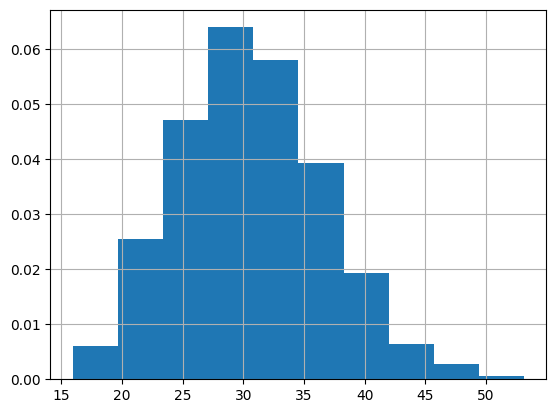

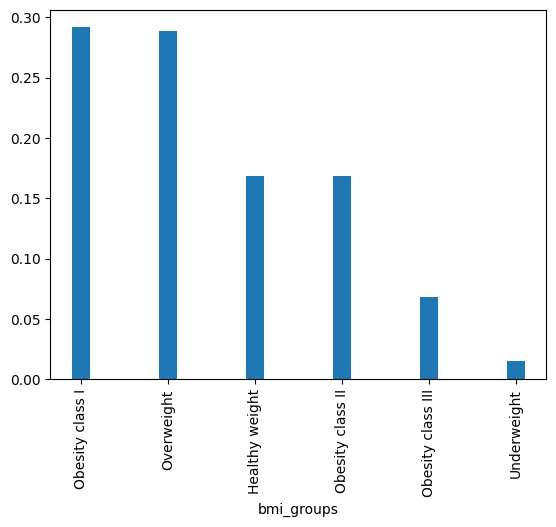

In [8]:
# Diagramme histogram
data["bmi"].hist(density=True)
plt.show()

# Diagramme bar chart
data["bmi_groups"].value_counts(normalize=True).plot(kind="bar", width=0.2)
plt.show()

Ici on a représenté la variable bmi de deux façons, la première avec un histogramme on sont placés les valeurs d'une manière continue. La seconde ou les valeurs sont réparties dans des classes d'imc et visualisées avec un graphique en baton. On remarque une prédominance des classes surpoids et obésité (classe I).

In [9]:
groups = data["bmi_groups"].value_counts()
modalities = groups.index

tab = pd.DataFrame(modalities, columns=["bmi_groups"])
tab["n"] = groups.values
tab["f"] = tab["n"] / len(data)
tab["F"] = tab["f"].cumsum()

display(tab)

,bmi_groups,n,f,F
0,Obesity class I,390,0.291698,0.291698
1,Overweight,386,0.288706,0.580404
2,Healthy weight,225,0.168287,0.748691
3,Obesity class II,225,0.168287,0.916978
4,Obesity class III,91,0.068063,0.985041
5,Underweight,20,0.014959,1.000000


Overweight
moyenne :  27.602590673575136
mediane :  27.71
modale :  0    28.31
Name: bmi, dtype: float64
variance :  2.047945490482966
ecart-type :  1.4310644606316538


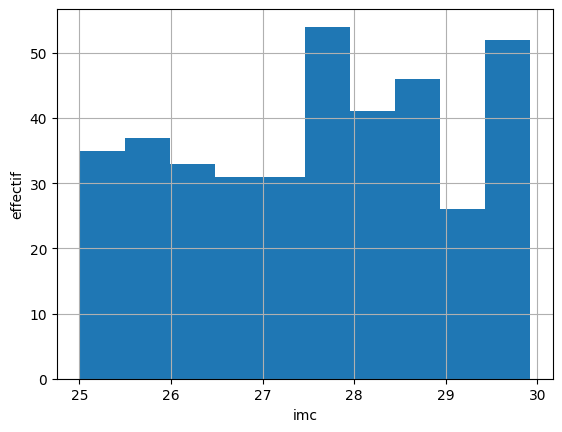

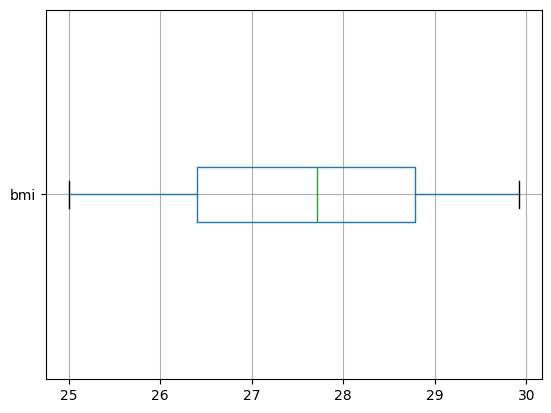

Obesity class I
moyenne :  32.34380769230769
mediane :  32.3
modale :  0    32.3
Name: bmi, dtype: float64
variance :  2.0385142835305716
ecart-type :  1.4277654861813167


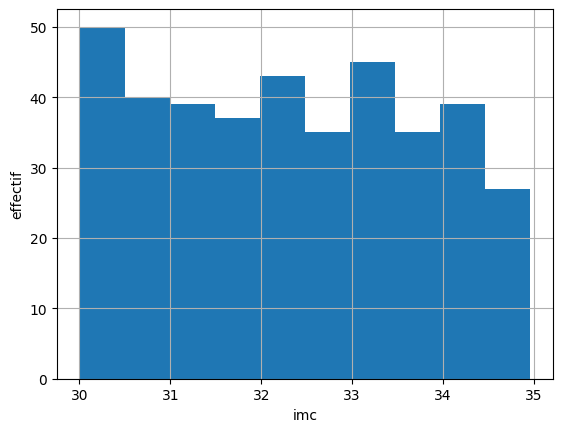

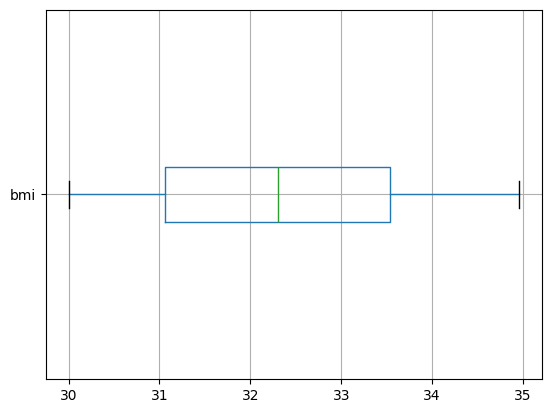

Healthy weight
moyenne :  22.61613333333333
mediane :  22.895
modale :  0    24.32
Name: bmi, dtype: float64
variance :  2.686762382222223
ecart-type :  1.6391346443237125


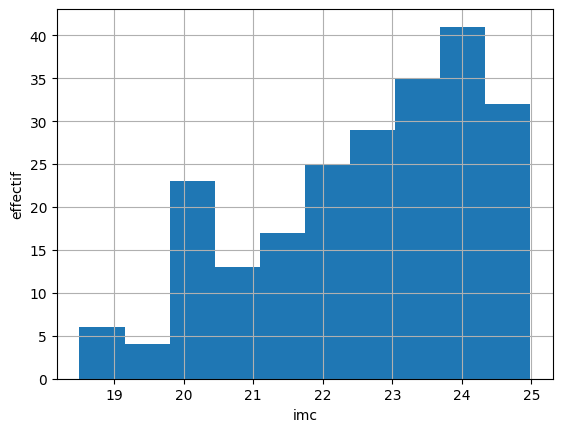

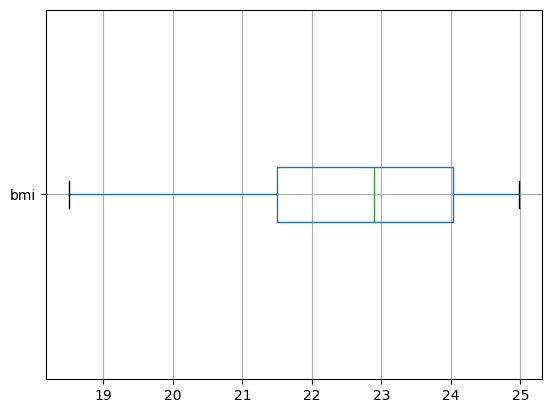

Obesity class II
moyenne :  37.182
mediane :  37.0
modale :  0    35.20
1    38.06
Name: bmi, dtype: float64
variance :  1.9247902222222222
ecart-type :  1.387368091827912


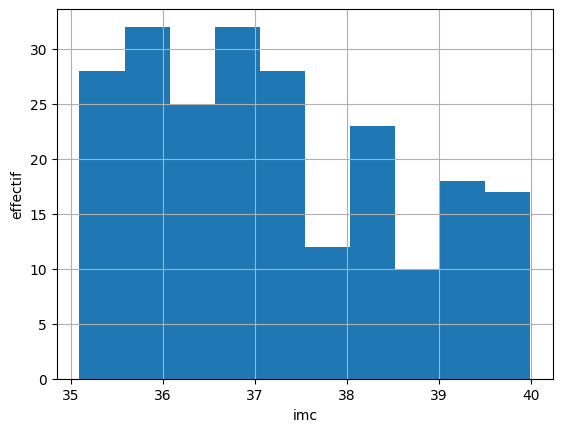

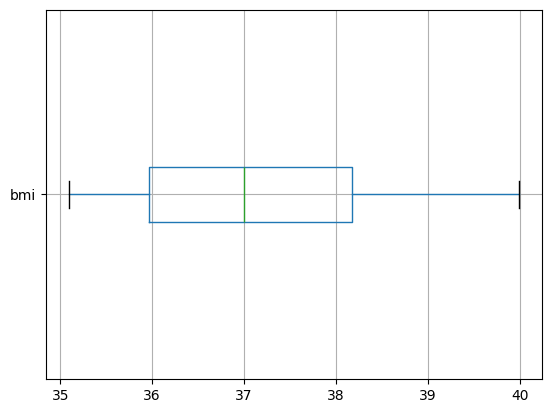

Obesity class III
moyenne :  43.10379120879121
mediane :  42.13
modale :  0    42.13
Name: bmi, dtype: float64
variance :  7.988344143219423
ecart-type :  2.826365889834404


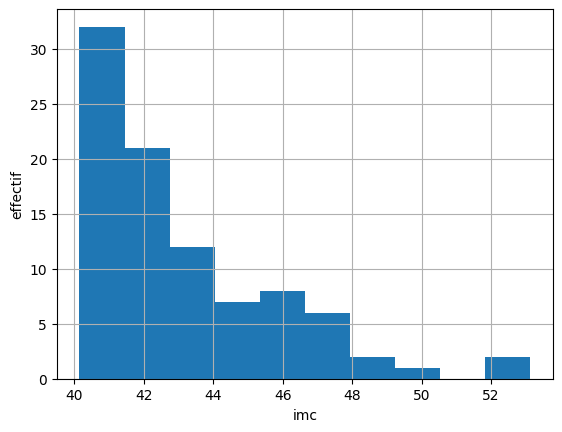

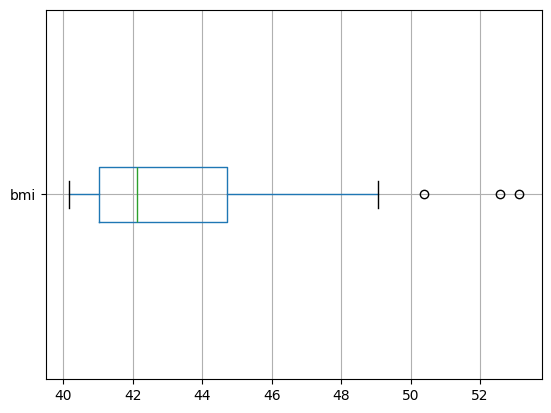

Underweight
moyenne :  17.56625
mediane :  17.575000000000003
modale :  0    17.290
1    18.335
Name: bmi, dtype: float64
variance :  0.3515571875
ecart-type :  0.592922581371295


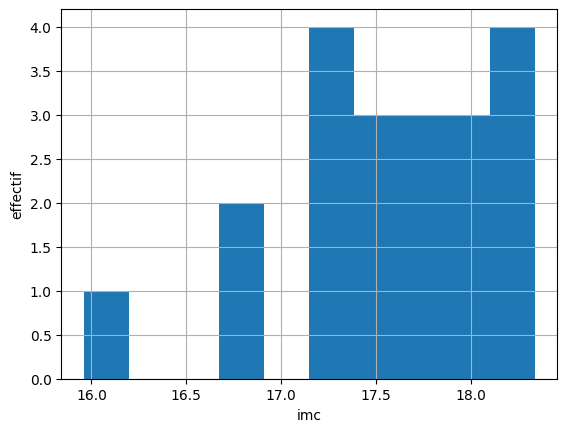

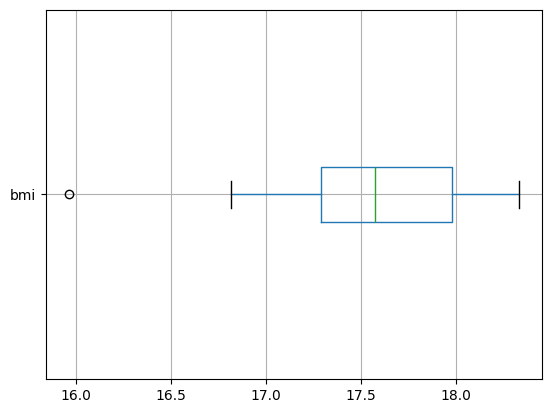

In [19]:
for group in data["bmi_groups"].unique():
    subset = data.loc[data.bmi_groups == group, :]
    print(group)
    print("moyenne : ", subset["bmi"].mean())
    print("mediane : ", subset["bmi"].median())
    print("modale : ", subset["bmi"].mode())
    print("variance : ", subset["bmi"].var(ddof=0))
    print("ecart-type : ", subset["bmi"].std(ddof=0))
    subset["bmi"].hist()
    plt.xlabel("imc")
    plt.ylabel("effectif")
    plt.show()
    subset.boxplot(column="bmi", vert=False)
    plt.show()


### Variable children

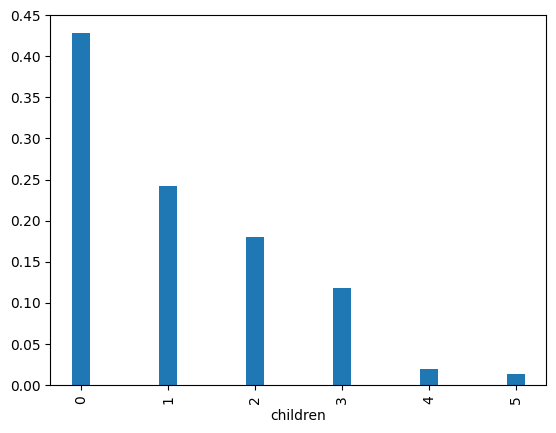

In [11]:
# Diagramme bar chart
data["children"].value_counts(normalize=True).plot(kind="bar", width=0.2)
plt.show()

### Variable smoker

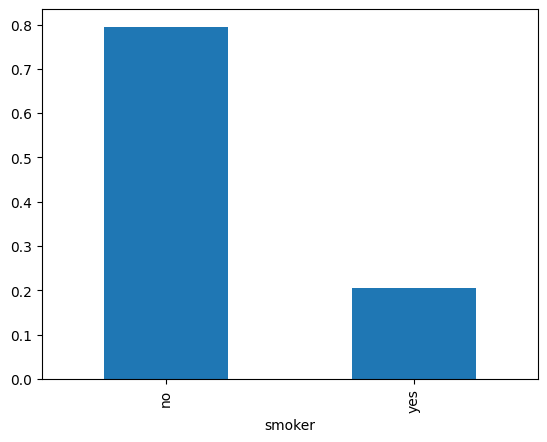

In [12]:
# Diagramme bar chart
data["smoker"].value_counts(normalize=True).plot(kind="bar")
plt.show()

Dans cet échantillon nous avons 80% de non fumeurs et 20% de fumeurs.

### Variable region

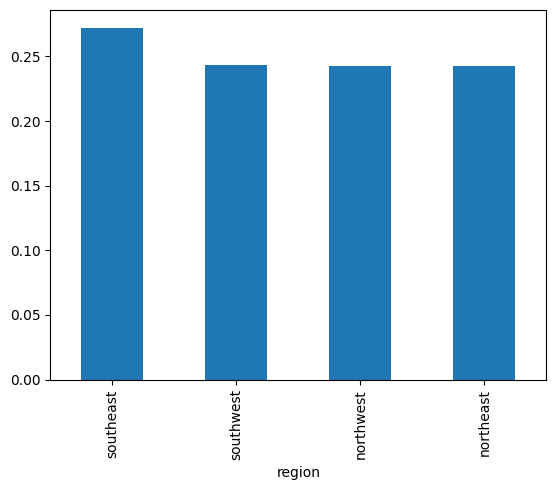

In [13]:
# Diagramme bar chart
data["region"].value_counts(normalize=True).plot(kind="bar")
plt.show()

Les différentes régions sont toutes représentées à hauteur de près de 25%.

### Variable charges

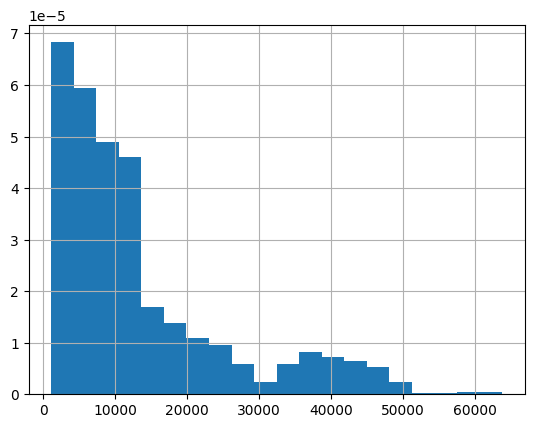

In [14]:
# Histogramme
data["charges"].hist(density=True, bins=20)
plt.show()